# Model Options

- Objective:   Your score is the percentage of passengers you correctly predict, aka accuracy
- Problem type: binary classification
- Following https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 
    - \> 50 samples 
    - predicting a category
    - labeled data 
    - <100K samples
    --> Linear SVC 

- From ZTM, might as well try an Ensemble Classifier also.


## More on Linear SVC

https://towardsdatascience.com/support-vector-machines-for-classification-fc7c1565e3
but i got lost in the math notation ~half way through

In [41]:
import pandas as pd
import numpy as np
import sklearn
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))
import preprocess as pp

In [42]:
df_raw = pd.read_csv("../data/train.csv")
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df = pp.aggregated_preprocess1(df_raw)

PassengerId, not in col list
Survived, not in col list
Pclass, not in col list
Name, not in col list
converting Sex to category type
Age, not in col list
SibSp, not in col list
Parch, not in col list
converting Ticket to category type
Fare, not in col list
Cabin, not in col list
converting Embarked to category type
converting Deck to category type
Deck_is_missing, not in col list
Age_is_missing, not in col list
Fare_is_missing, not in col list


In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Deck_is_missing,Age_is_missing,Fare_is_missing
0,0,3,2,22.0,1,0,524,7.2500,3,17,1,0,0
1,1,1,1,38.0,1,0,597,71.2833,1,6,0,0,0
2,1,3,1,26.0,0,0,670,7.9250,3,17,1,0,0
3,1,1,1,35.0,1,0,50,53.1000,3,6,0,0,0
4,0,3,2,35.0,0,0,473,8.0500,3,17,1,0,0


In [45]:
df.isna().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Deck               0
Deck_is_missing    0
Age_is_missing     0
Fare_is_missing    0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(35)

x = df.drop("Survived", axis=1)
y = df.Survived


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)


# Model Tuning

Based on https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc, i'll tune ther following: 
1. penalty{‘l1’, ‘l2’}
2. class_weight
3. max_iter


In [47]:
from matplotlib.colors import get_named_colors_mapping
from sklearn.svm import LinearSVC

grid = {
        "class_weight": [{0:1.5, 1: 1}, {0:2, 1: 1}, {0:1, 1: 2},"balanced"],
        "max_iter": [500, 1000, 2500, 5000, 10000]}

gs_model = GridSearchCV(LinearSVC(),
                        param_grid=grid, 
                        cv=5
                        )
gs_model.fit(x_train, y_train)

/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daorlova/Desktop/ml-projects/heart-disease-project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Converg

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'class_weight': [{0: 1.5, 1: 1}, {0: 2, 1: 1},
                                          {0: 1, 1: 2}, 'balanced'],
                         'max_iter': [500, 1000, 2500, 5000, 10000]})

In [48]:
gs_model.best_params_

{'class_weight': {0: 2, 1: 1}, 'max_iter': 5000}

In [49]:
gs_model.best_score_

0.7823697429331233

In [50]:
best_score = gs_model.score(x_test, y_test)

In [51]:
y_preds = gs_model.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       106
           1       0.73      0.63      0.68        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [52]:
confusion_matrix(y_test, y_preds)

array([[89, 17],
       [27, 46]])

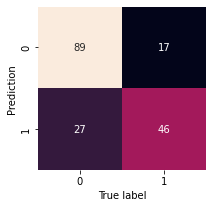

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

def plot_conf_mat(y_test, y_preds):
    """
    better display of the confusion matrix. 
    
    y_test: true
    y_preds: predictions
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Prediction")
    
    
plot_conf_mat(y_test, y_preds) 

# Now Let's run on the real test data

In [54]:
raw_test_df = pd.read_csv("../data/test.csv")
test_PassengerIDs = raw_test_df.PassengerId
test_df = pp.aggregated_preprocess1(raw_test_df)

PassengerId, not in col list
Pclass, not in col list
Name, not in col list
converting Sex to category type
Age, not in col list
SibSp, not in col list
Parch, not in col list
converting Ticket to category type
Fare, not in col list
Cabin, not in col list
converting Embarked to category type
converting Deck to category type
Deck_is_missing, not in col list
Age_is_missing, not in col list
Fare_is_missing, not in col list


In [55]:
test_preds = gs_model.predict(test_df)

# Convert to Kaggle format

In [56]:
kaggle_data = pd.DataFrame()
kaggle_data["PassengerId"] = test_PassengerIDs
kaggle_data["Survived"] = test_preds

In [57]:
best_score_percent = round(best_score, 3)*100
kaggle_data.to_csv("../result-csv/LinearSVC-"+str(best_score_percent)+"p_accuracy.csv", index=False)